In [1]:
import time
import numpy as np

import matplotlib.pyplot as plt

from crispy.psf import GaussianPSFCube
from crispy.crispy_core import IFS

from crispy.utils import nearest
from crispy.utils import calculate_bin_edges

%matplotlib inline

In [2]:
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
plt.rcParams["image.origin"] = "lower" 

In [3]:
836-684

152

In [4]:
wavelengths = np.array([600,605,610, ])
wavelengths = np.linspace(600, 752, 50)



lam_ref = (752+600)//2
gaussian_psfs = GaussianPSFCube(wavelengths, lam_ref, fwhm=2)
lammin, lammax = 600, 752


ifs = IFS(lam_ref, nlens=101, interlace=2, npix=1024)

In [5]:
nearest(wavelengths, 610)

[3, 4]

In [6]:
np.searchsorted(np.asarray(wavelengths), [610])

array([4], dtype=int64)

In [7]:
grid = tuple([np.asarray(wavelengths) for _ in range(3)])
xi = [[590, 610, 630]]
indices = []
for x, g in zip(xi, grid):
    i = np.searchsorted(g, x) - 1
    i[i < 0] = 0
    i[i > g.size - 2] = g.size - 2
    indices.append(i)
indices

[array([0, 3, 9], dtype=int64)]

In [8]:
i = np.searchsorted(wavelengths, [590]) - 1
print(i)
i[i < 0] = 0
i[i > 1 - 2] = 1 - 2

[-1]


In [9]:
new_psf = gaussian_psfs[0] + gaussian_psfs[1]
new_psf

In [10]:
res = gaussian_psfs.interp(753)
res

In [11]:
res._psf, gaussian_psfs[0]._psf

(array([[2.58124969e-25, 5.62288123e-25, 1.21121890e-24, ...,
         1.21121890e-24, 5.62288123e-25, 2.58124969e-25],
        [5.62288123e-25, 1.22486381e-24, 2.63846619e-24, ...,
         2.63846619e-24, 1.22486381e-24, 5.62288123e-25],
        [1.21121890e-24, 2.63846619e-24, 5.68349213e-24, ...,
         5.68349213e-24, 2.63846619e-24, 1.21121890e-24],
        ...,
        [1.21121890e-24, 2.63846619e-24, 5.68349213e-24, ...,
         5.68349213e-24, 2.63846619e-24, 1.21121890e-24],
        [5.62288123e-25, 1.22486381e-24, 2.63846619e-24, ...,
         2.63846619e-24, 1.22486381e-24, 5.62288123e-25],
        [2.58124969e-25, 5.62288123e-25, 1.21121890e-24, ...,
         1.21121890e-24, 5.62288123e-25, 2.58124969e-25]]),
 array([[9.98686914e-39, 3.39294839e-38, 1.13261610e-37, ...,
         1.13261610e-37, 3.39294839e-38, 9.98686914e-39],
        [3.39294839e-38, 1.15272350e-37, 3.84796068e-37, ...,
         3.84796068e-37, 1.15272350e-37, 3.39294839e-38],
        [1.13261610e-37, 

In [12]:
t_1 = time.time()
image = ifs.propagate_mono(lammin+5, lammax-5, gaussian_psfs, nlam=30)
# image = ifs.propagate_mono(600-5, 660+5+80, gaussian_psfs, nlam=10)
t_2 = time.time()

In [13]:
t_2 - t_1

8.258489847183228

In [14]:
np.any(image < 0)

False

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


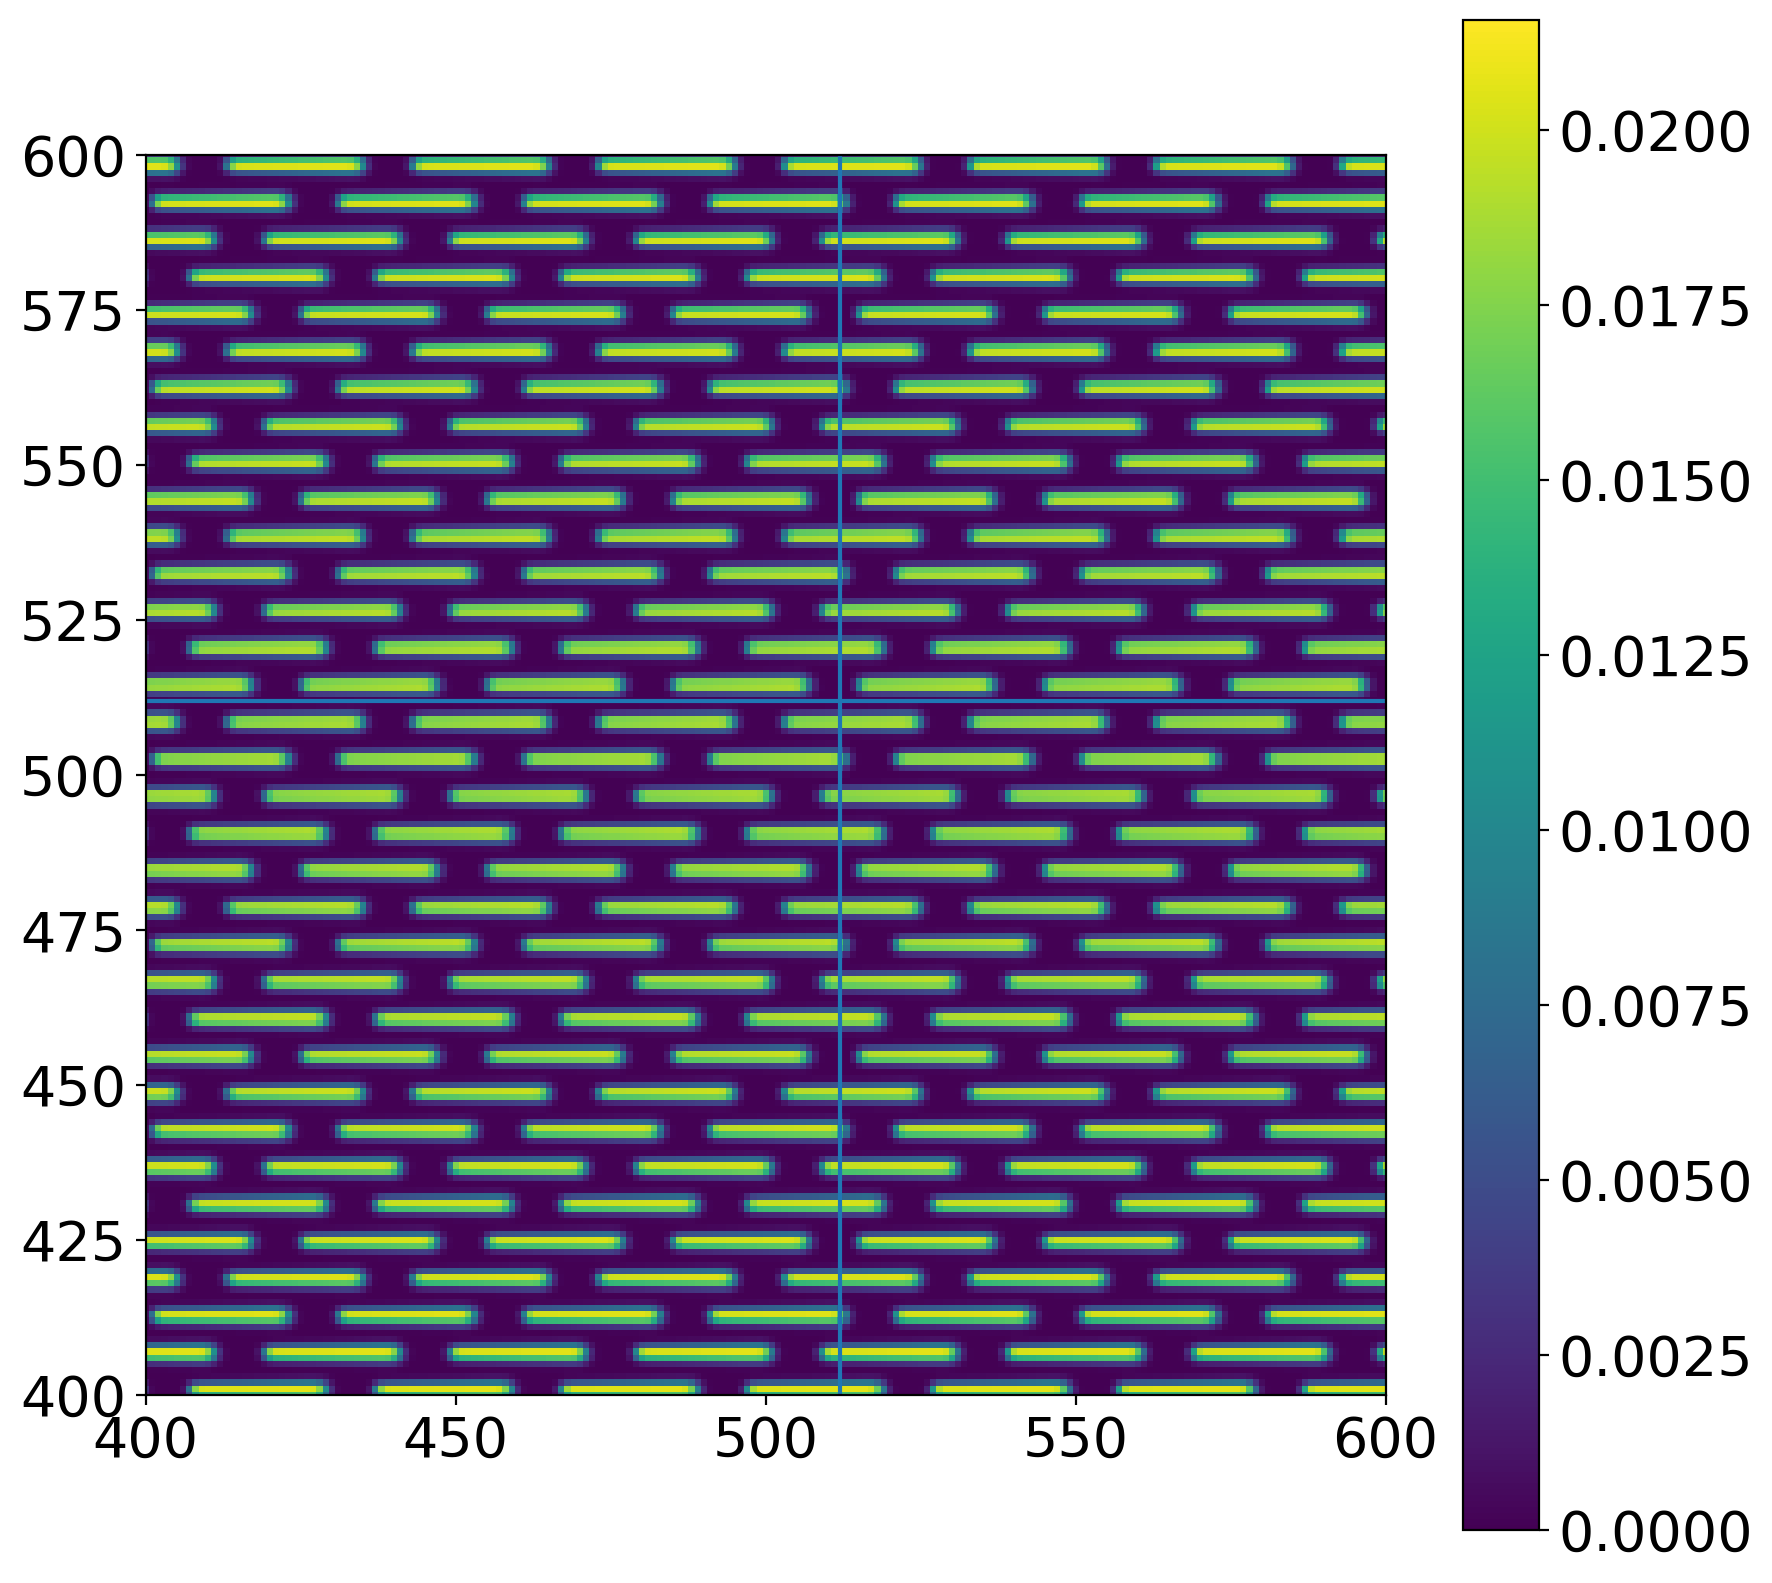

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(image[20:-20, 20:-20])
plt.axvline(512)
plt.axhline(512)
plt.axis([400,600,400,600])
# plt.axvline(527.83291301)
# plt.axhline(512.0)
# plt.axis([400,650, 400,650])
plt.colorbar()


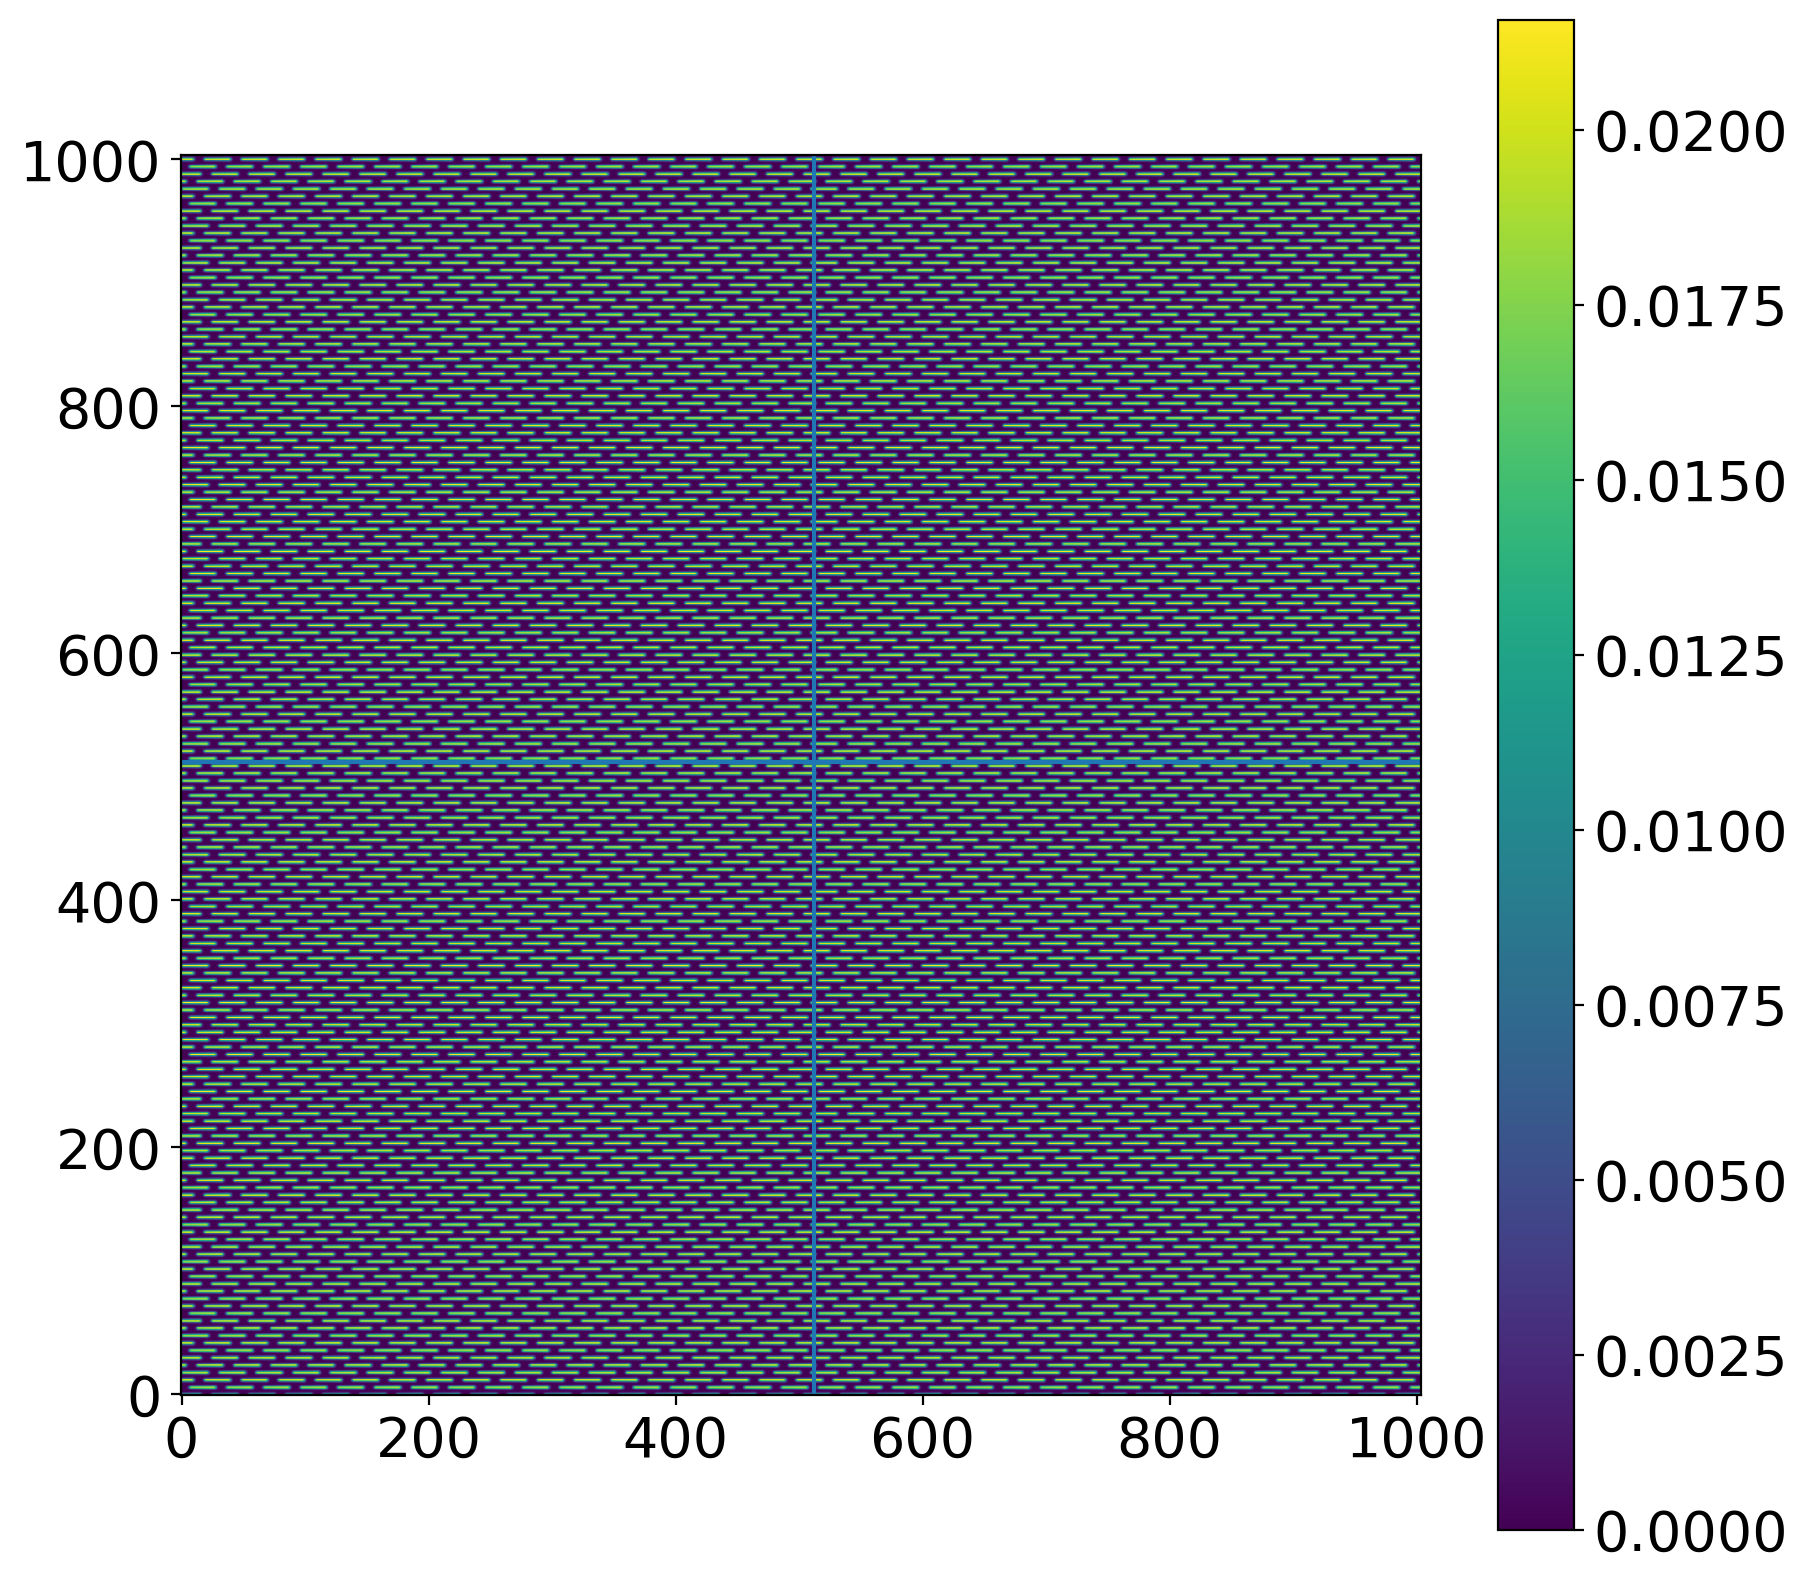

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(image[20:-20, 20:-20])
plt.axvline(512)
plt.axhline(512)

# plt.axvline(527.83291301)
# plt.axhline(512.0)
# plt.axis([400,650, 400,650])
plt.colorbar()


In [17]:
lam_cen = np.linspace(600, 752, 20)

images = ifs.propagate_main(lam_cen, image_test=True, parallel=False)

9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
9960.0
Ellapsed time: 14.186001062393188


In [18]:
images_parallel = ifs.propagate_main(lam_cen, image_test=True, parallel=True)

Parallel processing return the follow order:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Ellapsed time: 4.981910705566406


In [19]:
(10.45802927017212 - 53.13706374168396) /  53.13706374168396 *100

-80.31876710197632

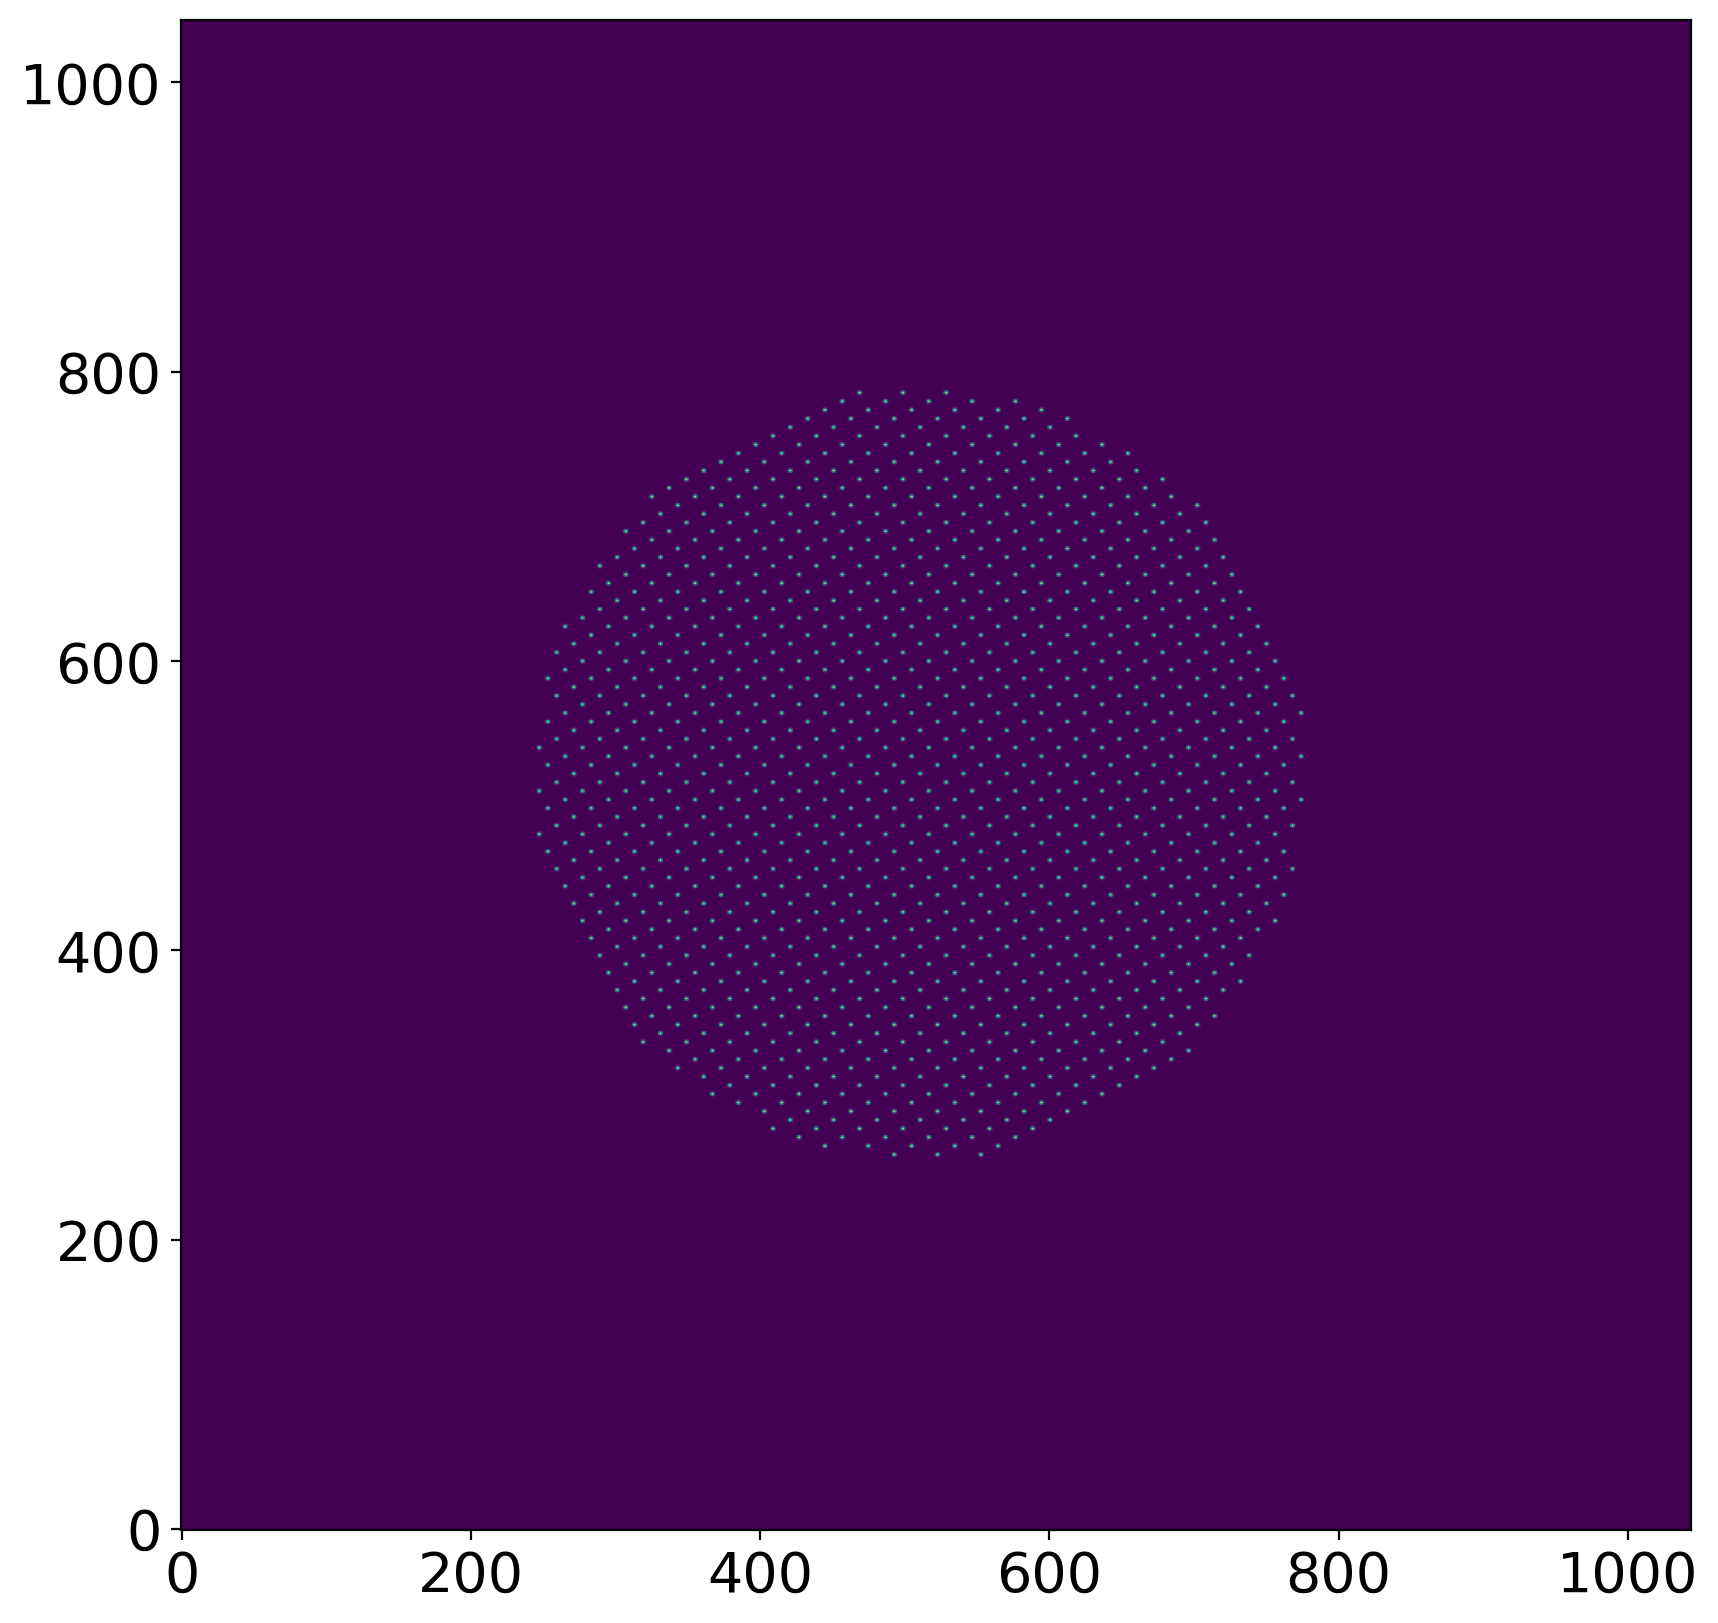

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(images[0])

In [21]:
print(images[0].sum())

9960.005400784514


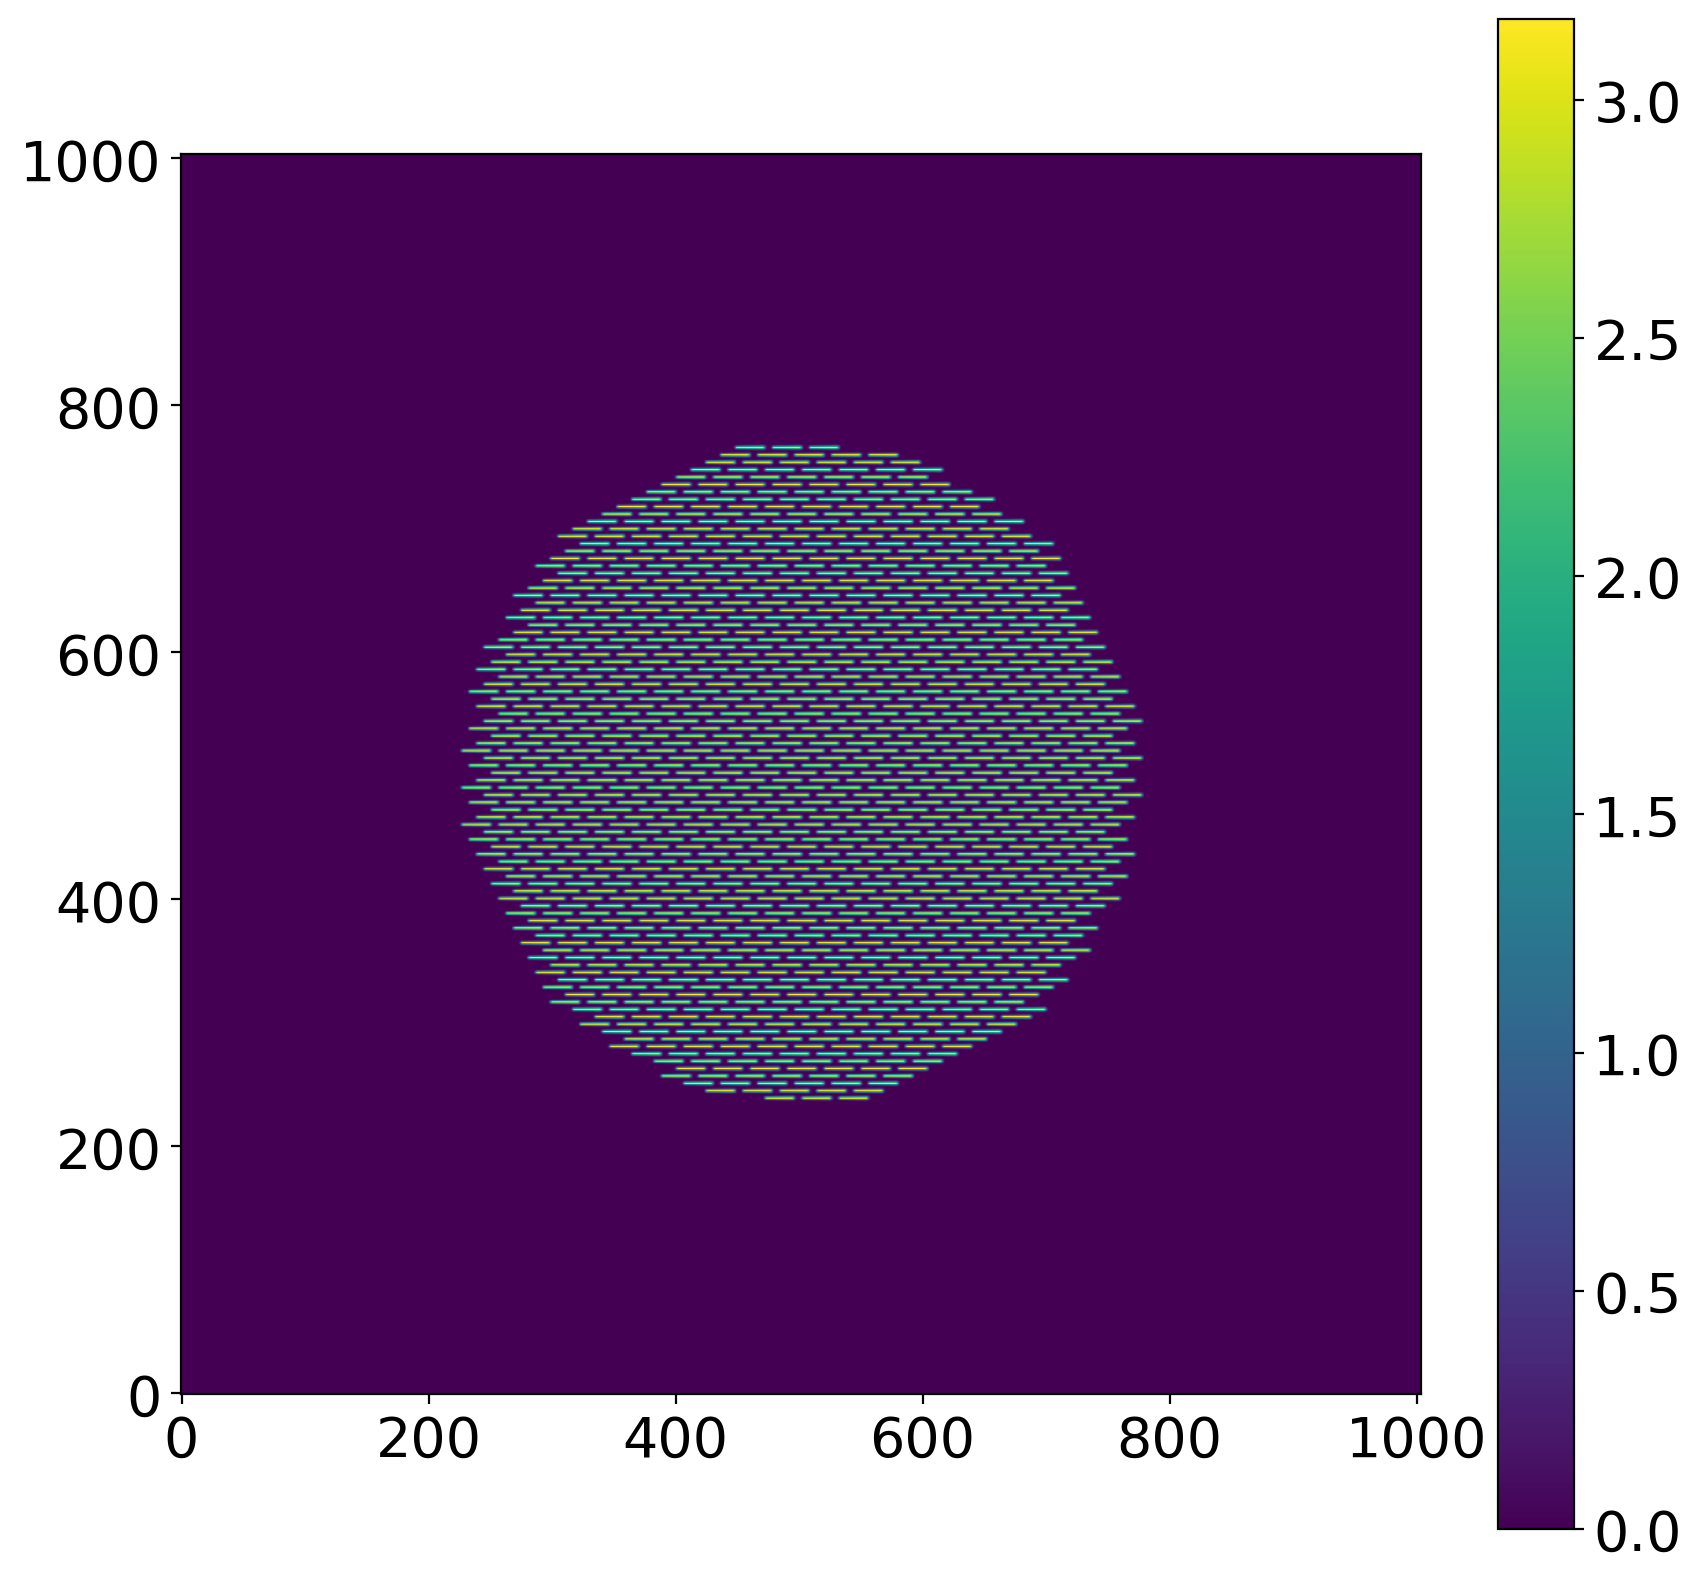

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(sum(images)[20:-20, 20:-20])
# plt.axis([400,600,400,600])
plt.colorbar()

In [23]:
print(np.any(sum(images)<0)), print(np.any(sum(images_parallel)<0))

False
False


(None, None)

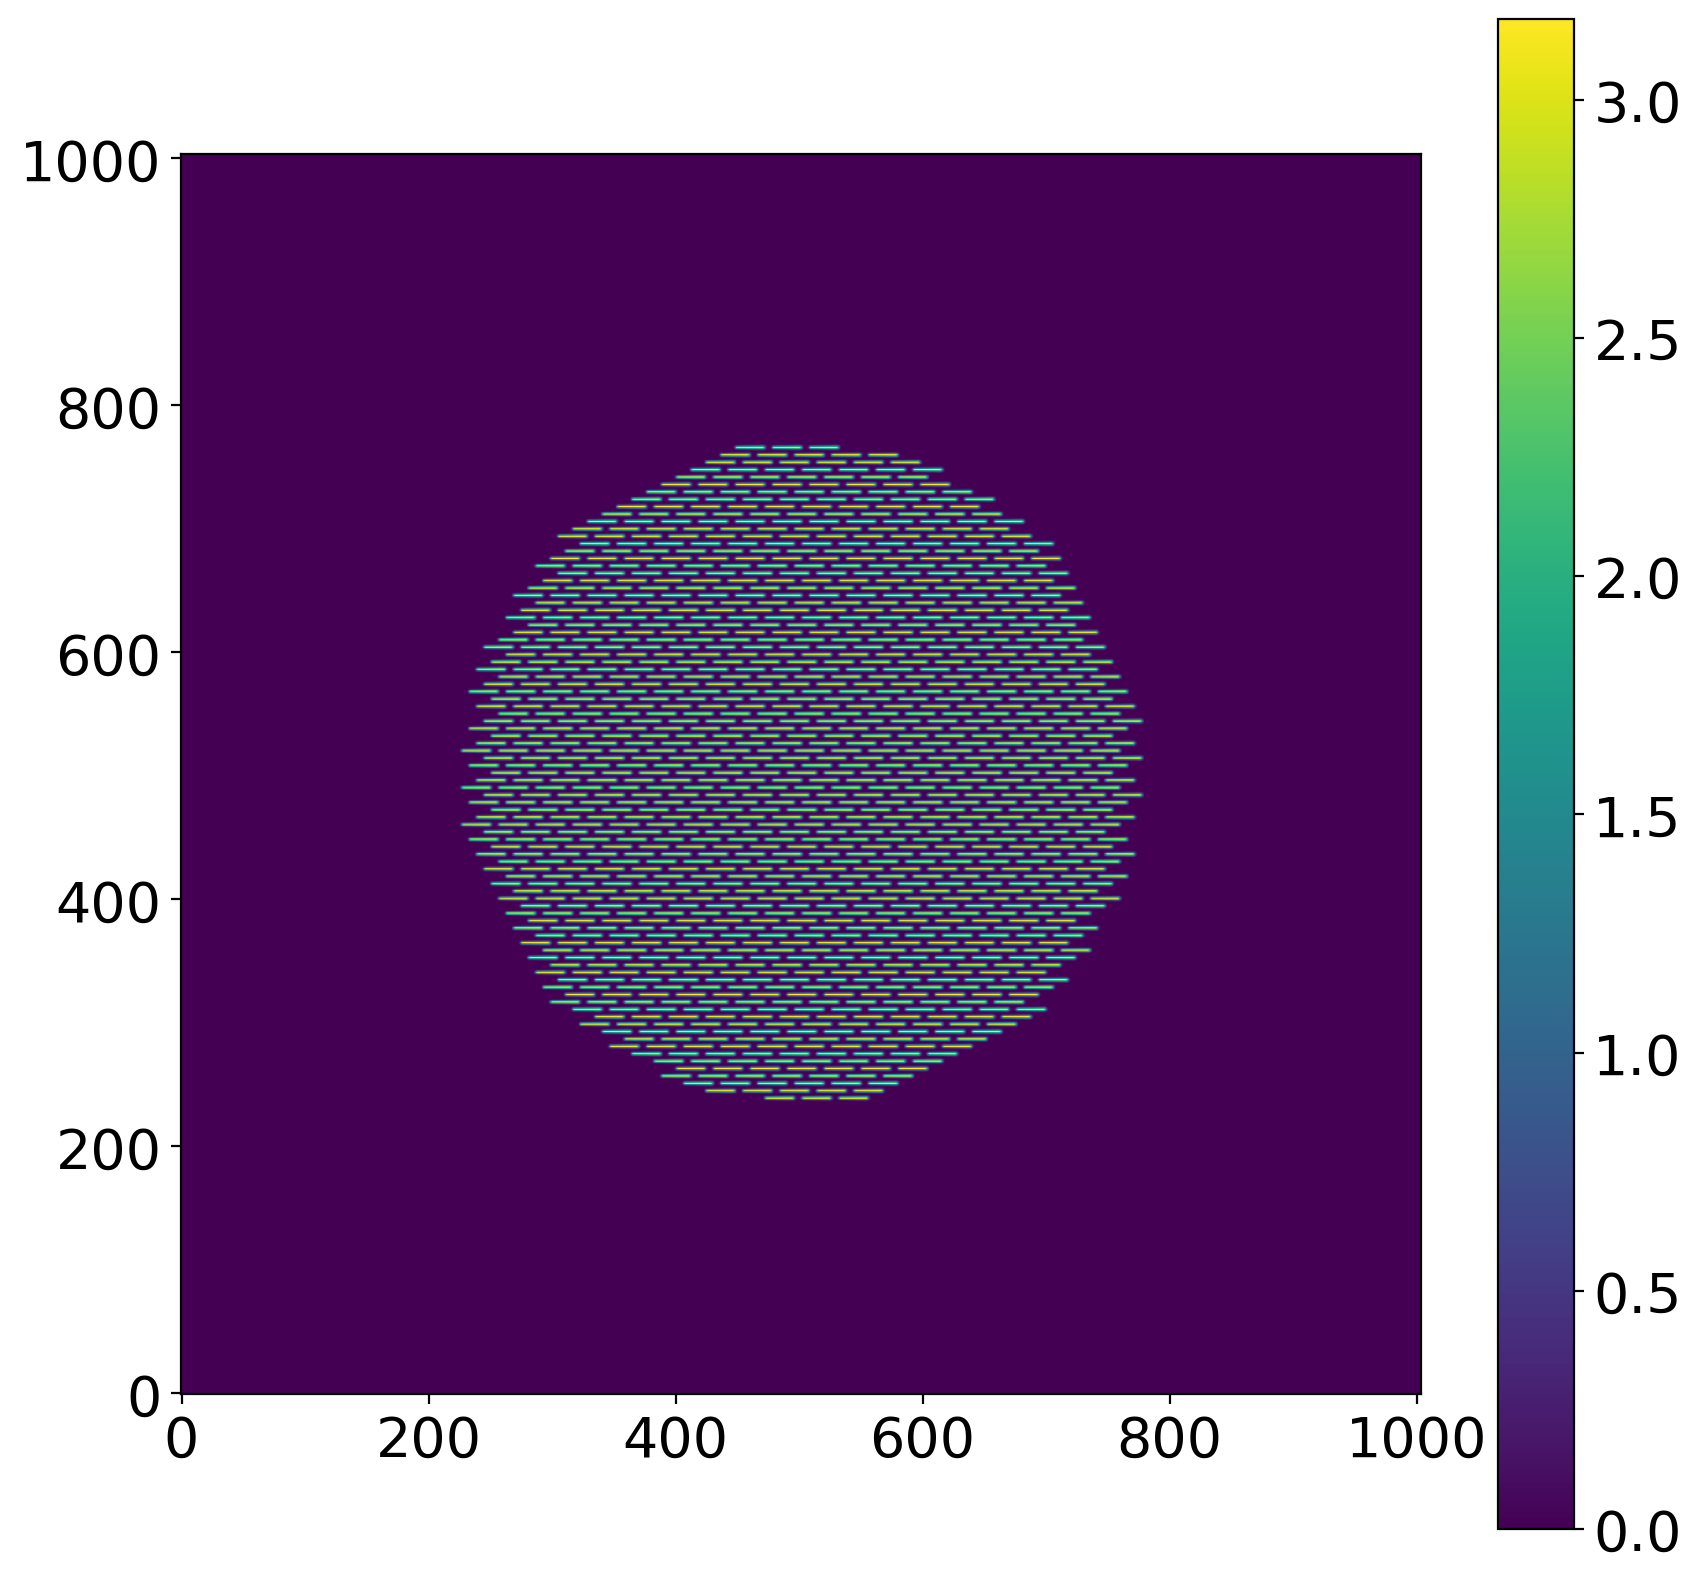

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(sum(images_parallel)[20:-20, 20:-20])
# plt.axis([400,600,400,600])
plt.colorbar()

In [25]:
np.sum(images_parallel), np.sum(images)

(199200.02517166646, 199200.02517166646)

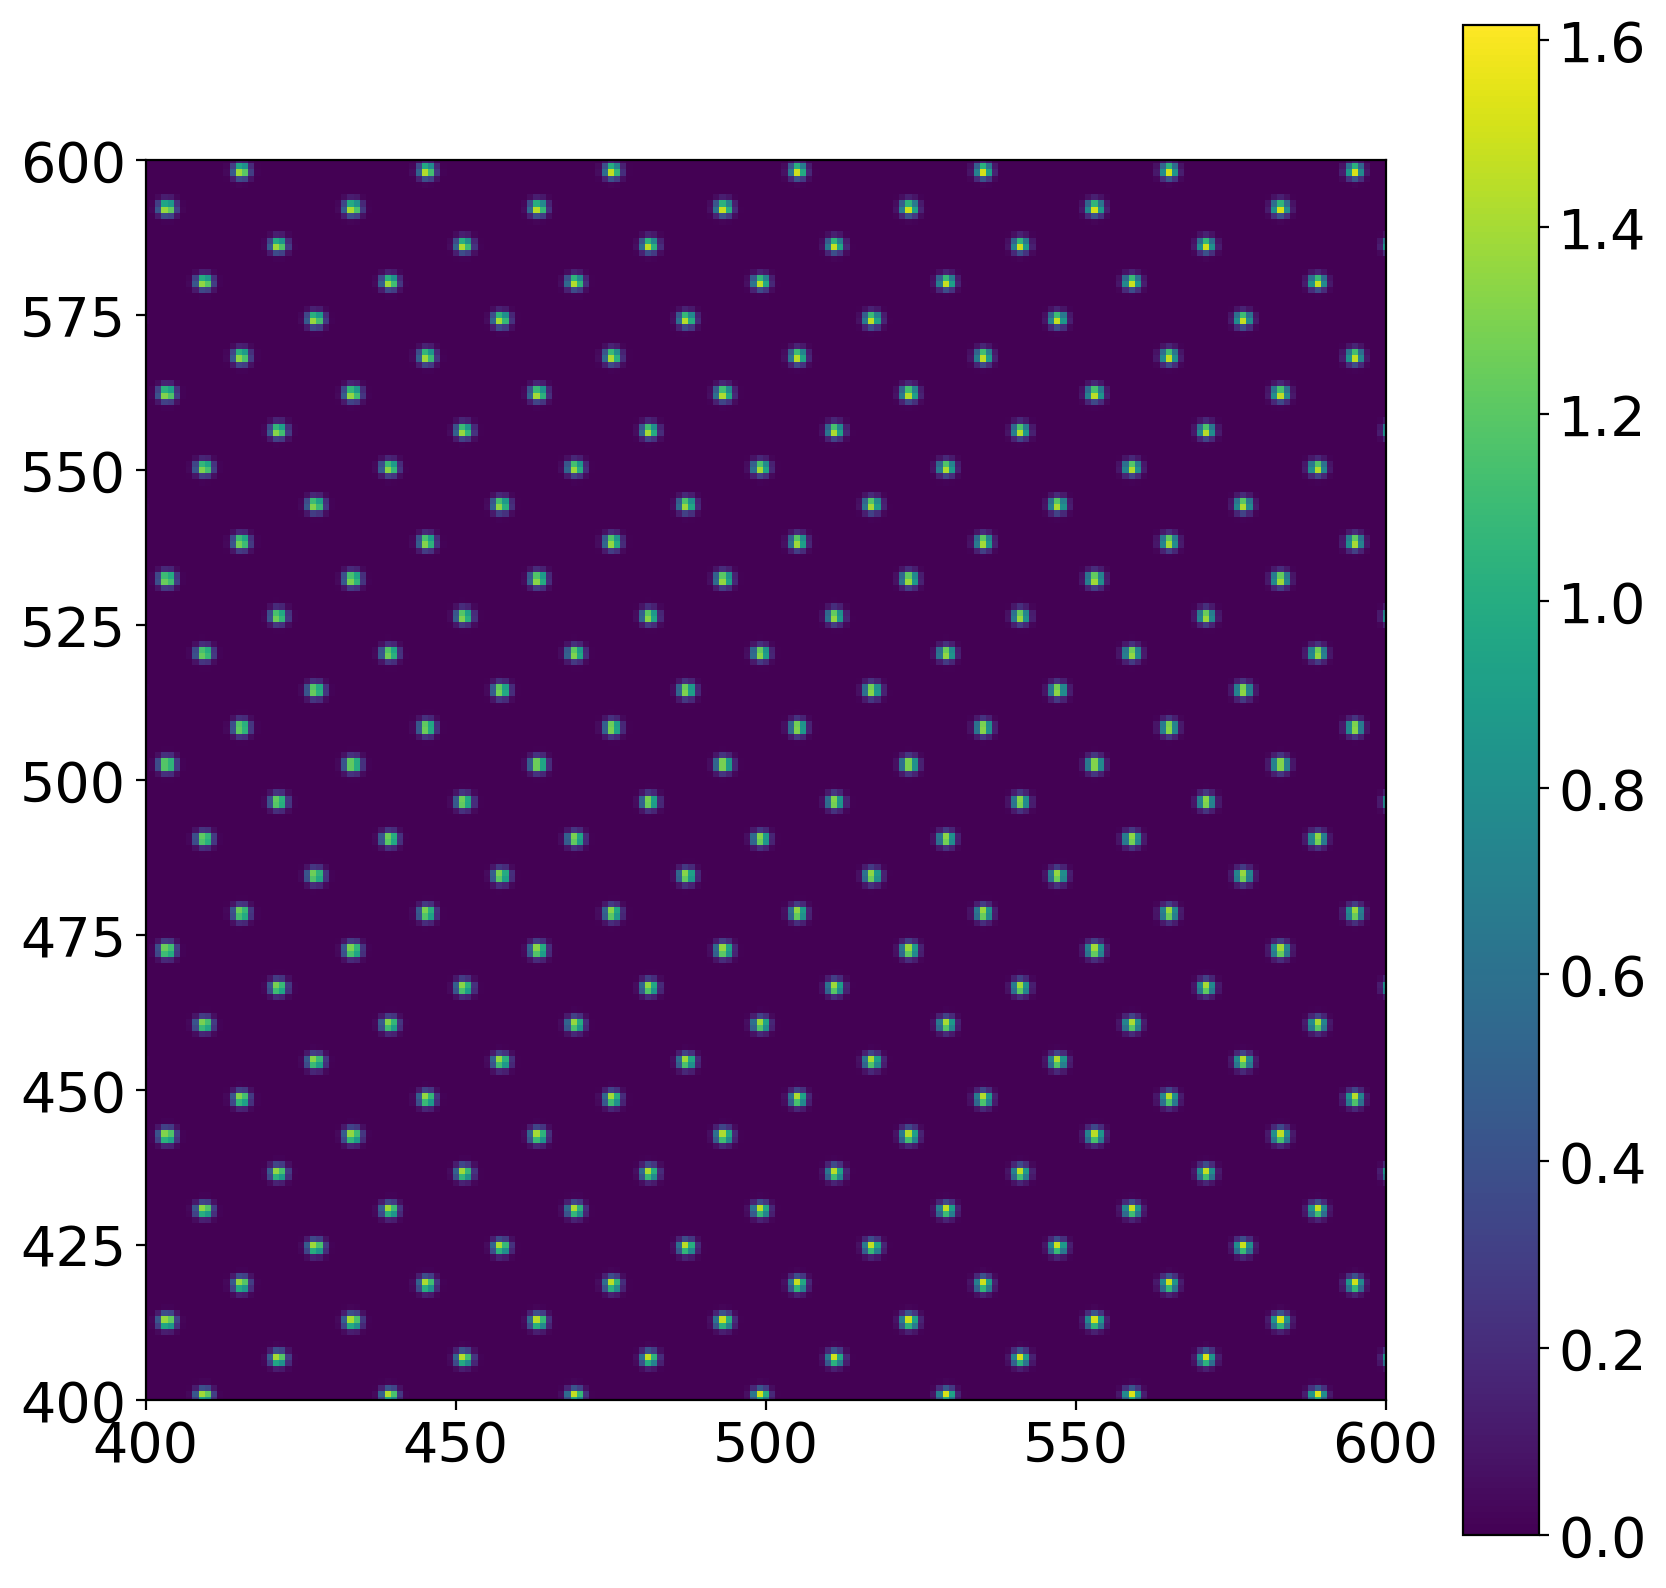

In [45]:
plt.figure(figsize=(10,10))
plt.imshow((images[2]- images_parallel[2])[20:-20, 20:-20])
plt.axis([400,600,400,600])
plt.colorbar()

In [21]:
print(np.sum(images)/20)

9960.001258583323


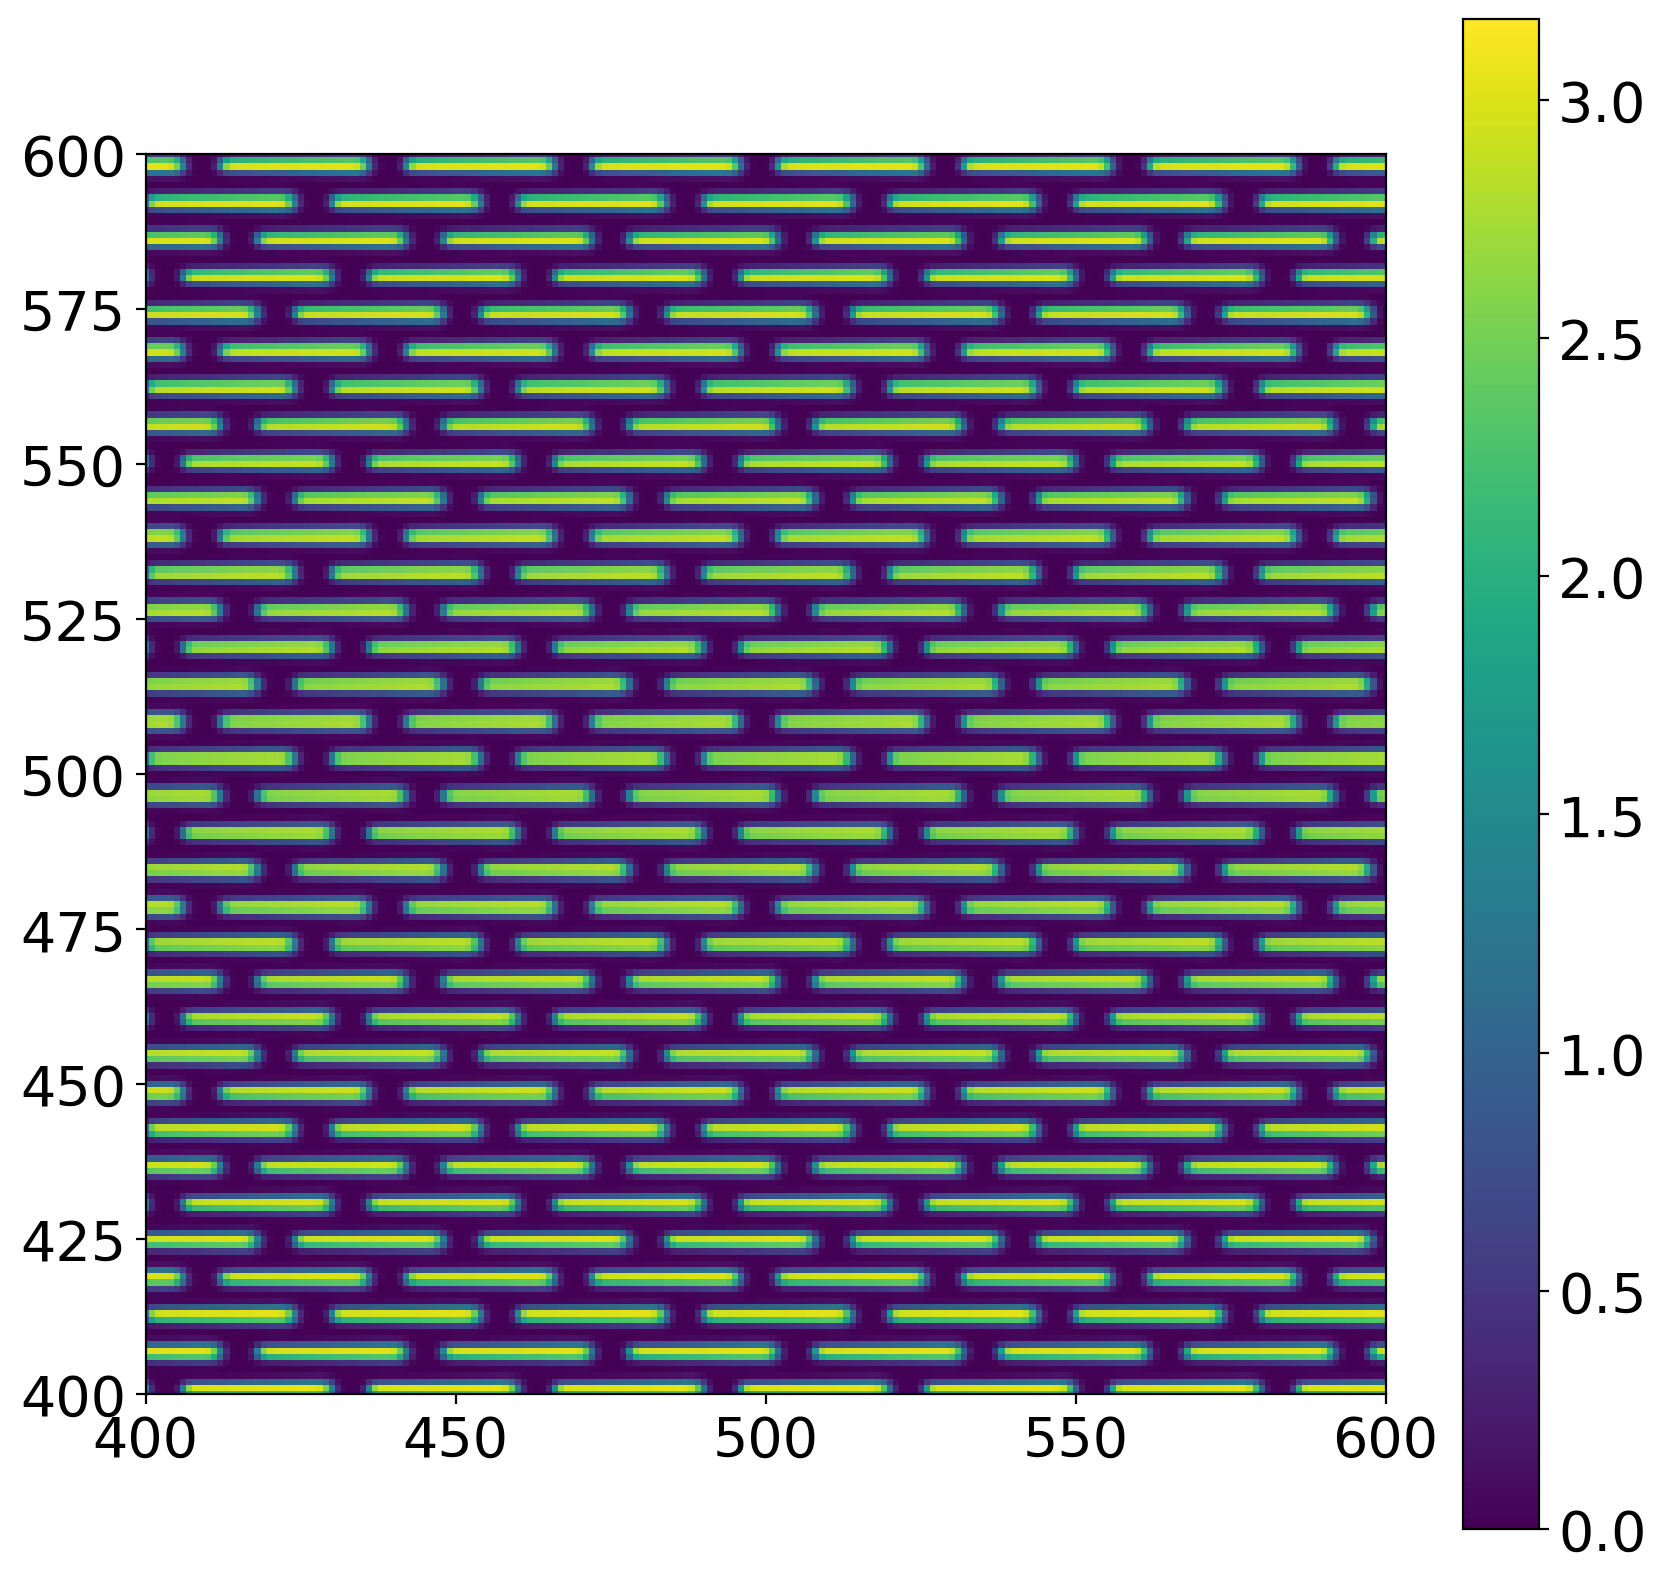

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(sum(images)[20:-20, 20:-20])
plt.axis([400,600,400,600])
plt.colorbar()


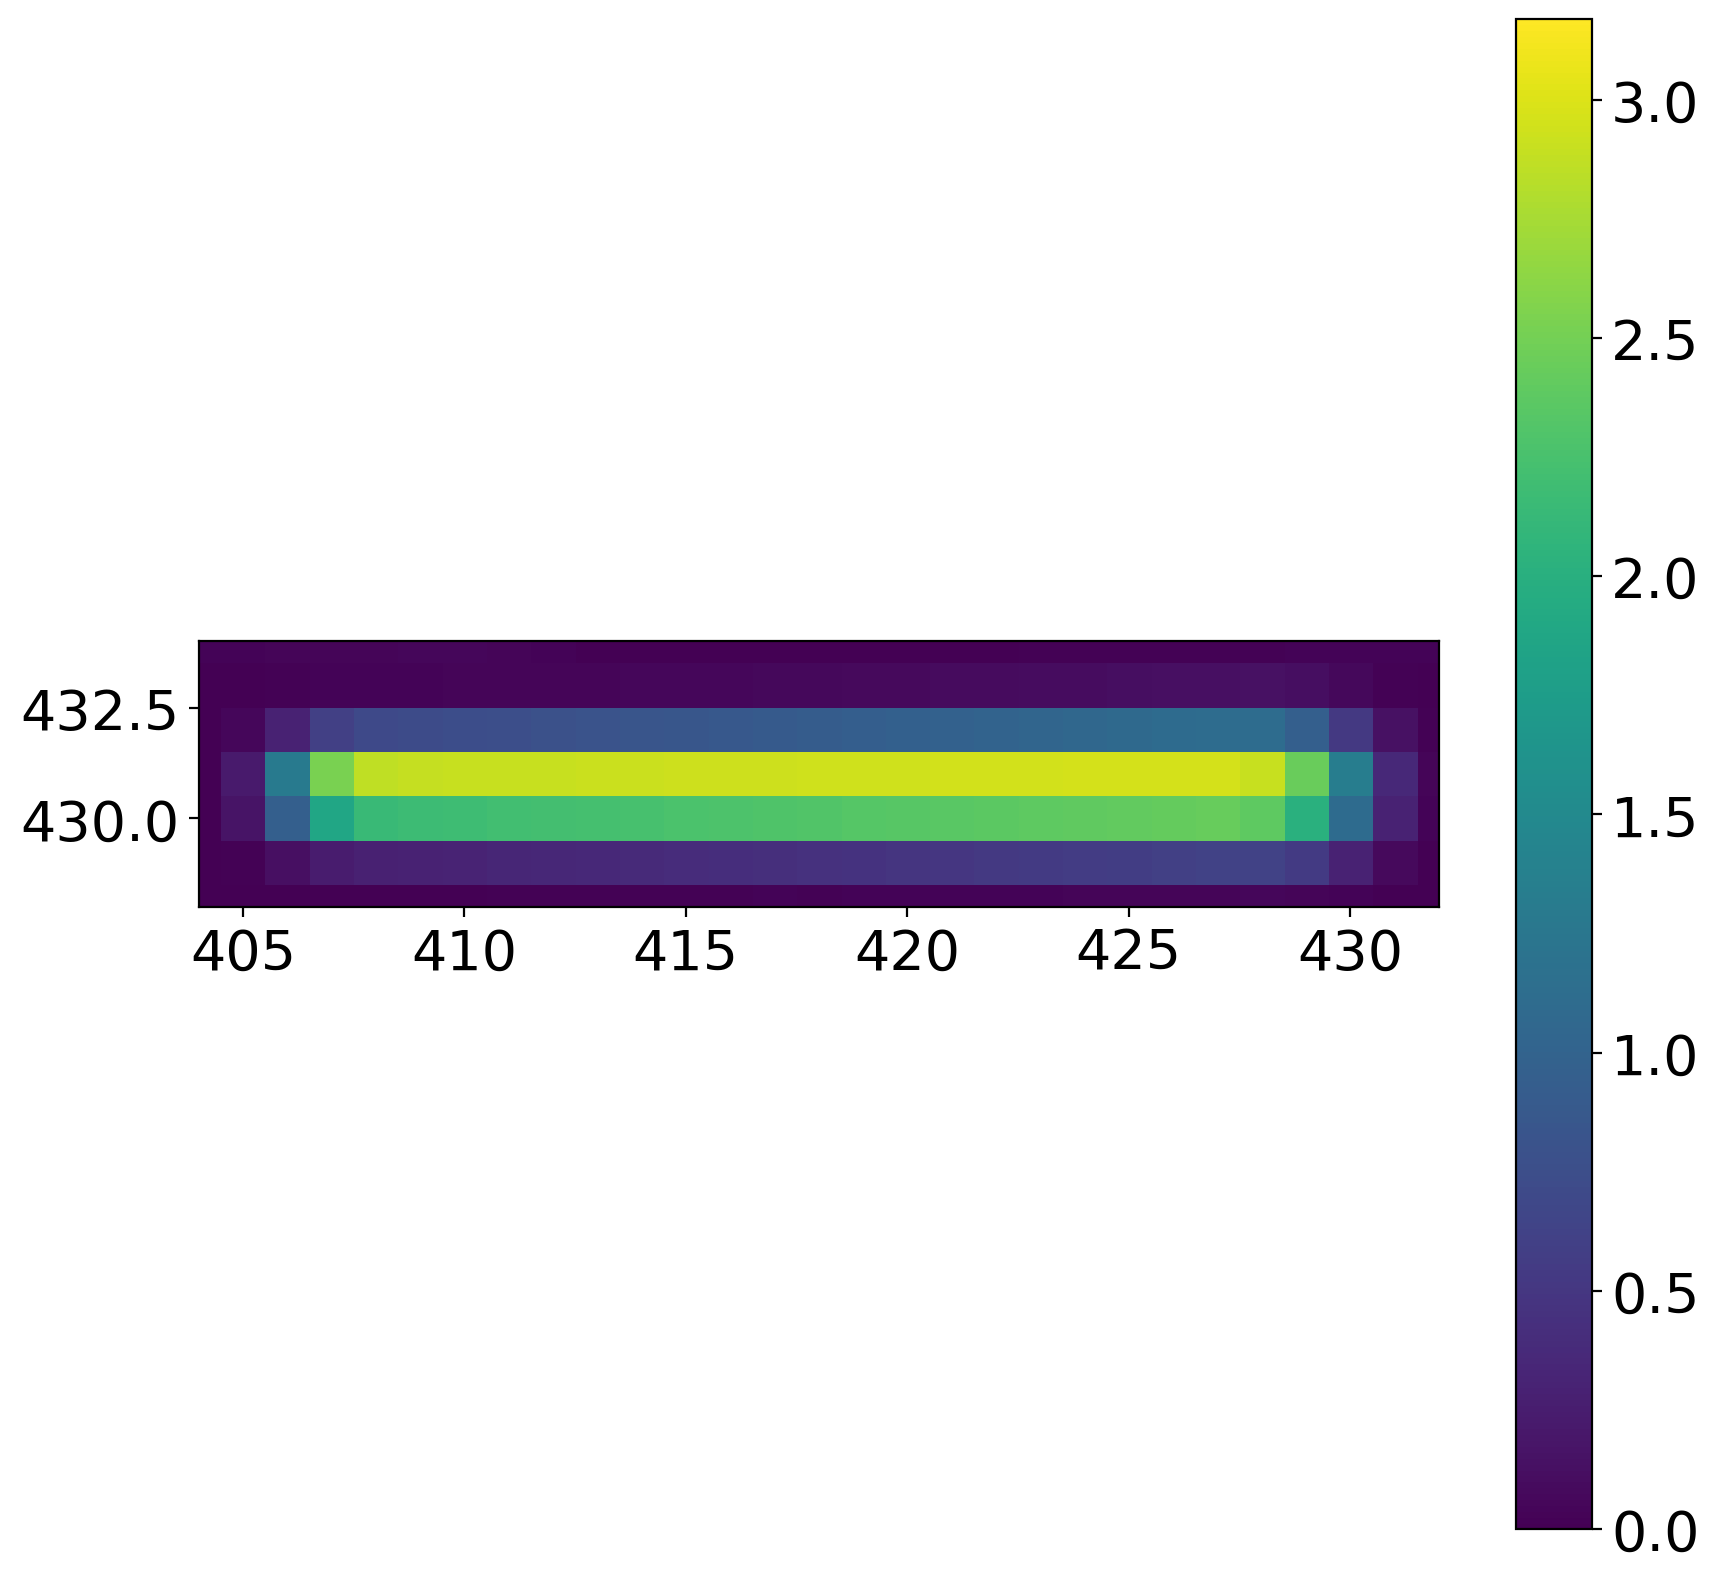

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(sum(images)[20:-20, 20:-20])
plt.axis([404,432,428,434])
plt.colorbar()

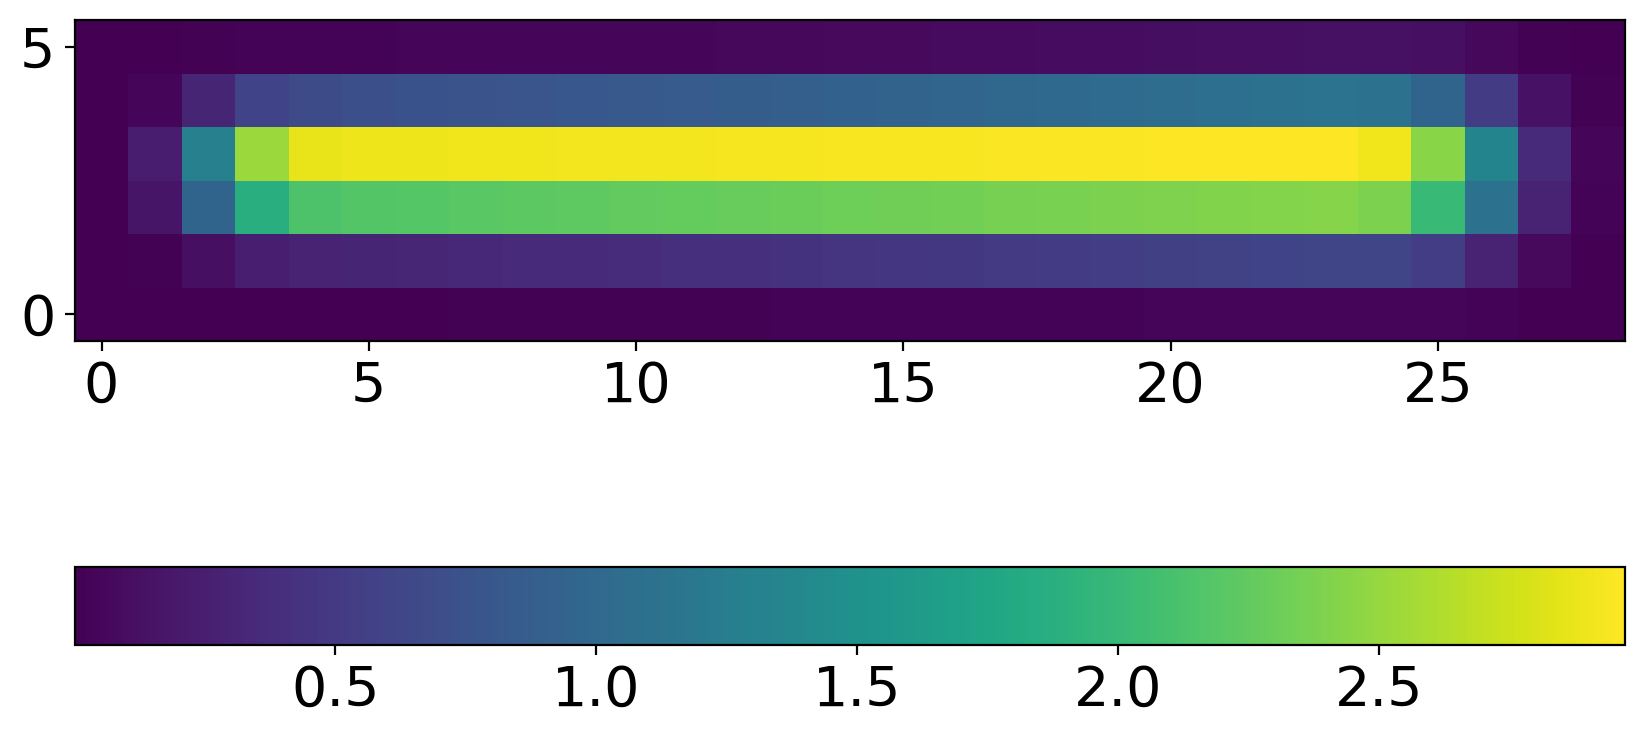

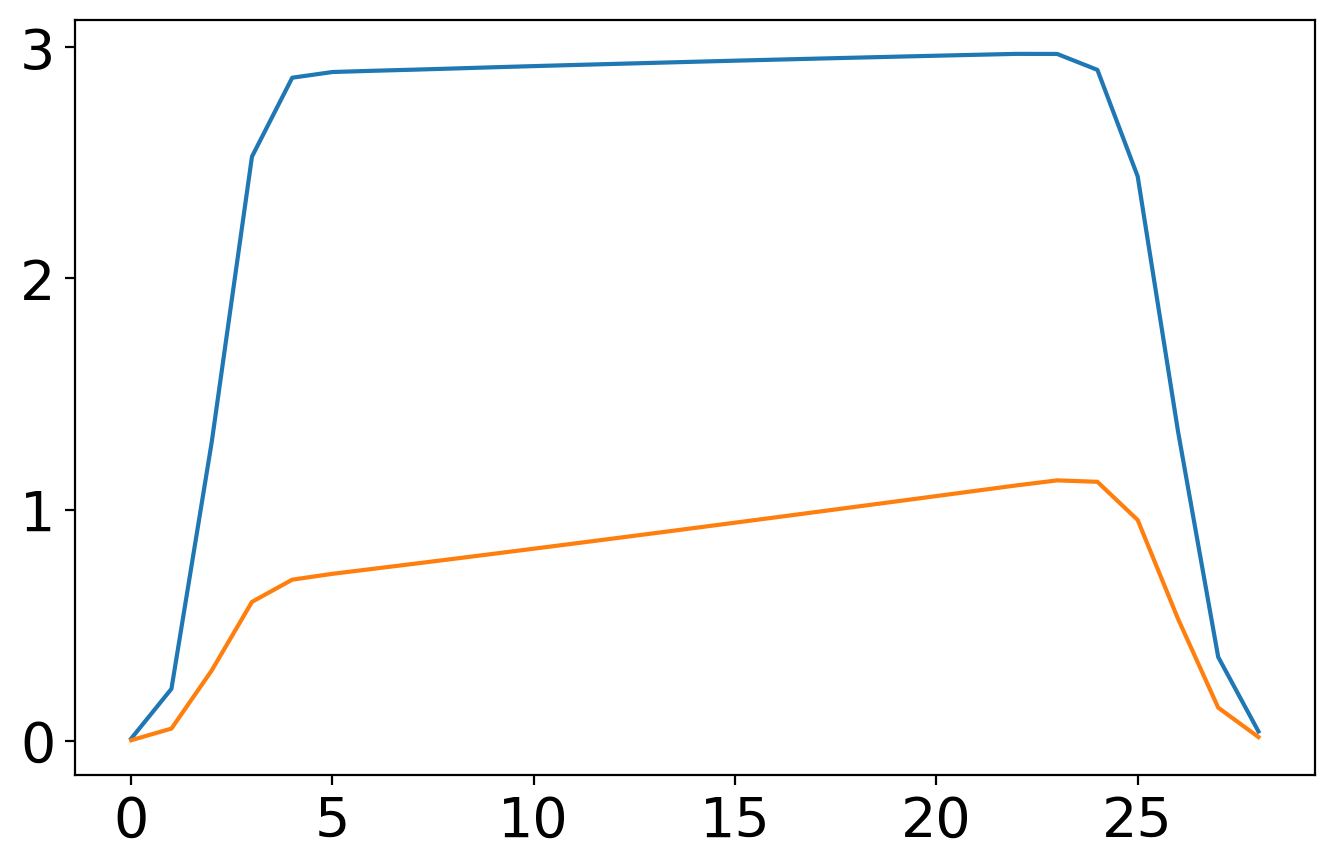

In [21]:
polyimage = np.sum(images,axis=0)[20:-20, 20:-20]
plt.figure(figsize=(10,10))
plt.imshow(polyimage[428:434, 404:433])
# plt.axis([404,432,428,434])
plt.colorbar(orientation='horizontal')
plt.show()

plt.plot(polyimage[428:434, 404:433][3])
plt.plot(polyimage[428:434, 404:433][4])

In [23]:
np.diff(calculate_bin_edges(lam_cen)).size

20

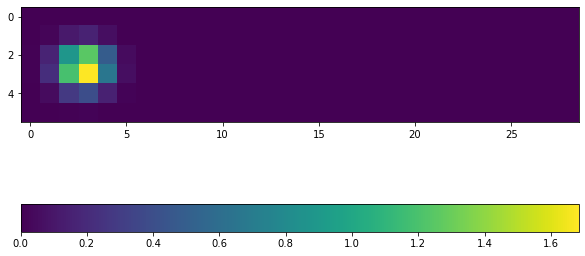

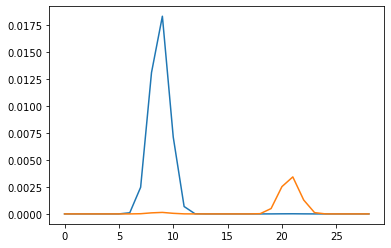

In [25]:
polyimage = np.sum(images,axis=0)[20:-20, 20:-20]
plt.figure(figsize=(10,10))
plt.imshow(images[0][20:-20, 20:-20][428:434, 404:433])
# plt.axis([404,432,428,434])
plt.colorbar(orientation='horizontal')
plt.show()

plt.plot(images[0][20:-20, 20:-20][418:434, 404:433][3])
plt.plot(images[0][20:-20, 20:-20][418:434, 404:433][4])

In [27]:
images[0][20:-20, 20:-20][428:434, 404:433].sum() / 8

0.9999710184215864

In [15]:
np.sqrt(1024**2 * (13e-6 / 174e-6)* np.sin(np.deg2rad(23))/np.pi)

98.70998323298438

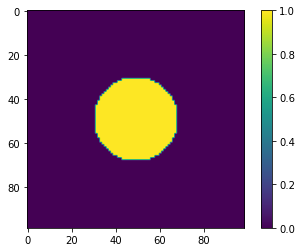

In [16]:
image_plane = np.zeros((99, 99))
i_lens, j_lens = np.indices(image_plane.shape) - 99 // 2 
r = np.hypot(i_lens, j_lens)
mask = r < 99//5
image_plane[mask] = 1

plt.imshow(image_plane)
plt.colorbar()

In [17]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
np.histogram_bin_edges(np.arange(10),11)

array([0.        , 0.81818182, 1.63636364, 2.45454545, 3.27272727,
       4.09090909, 4.90909091, 5.72727273, 6.54545455, 7.36363636,
       8.18181818, 9.        ])

In [20]:
calculate_bin_edges(np.arange(1, 10))

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [35]:
test = ifs.propagate_main(np.array([650]), dlam=5, parallel=False)

AttributeError: 'list' object has no attribute 'map_psf'

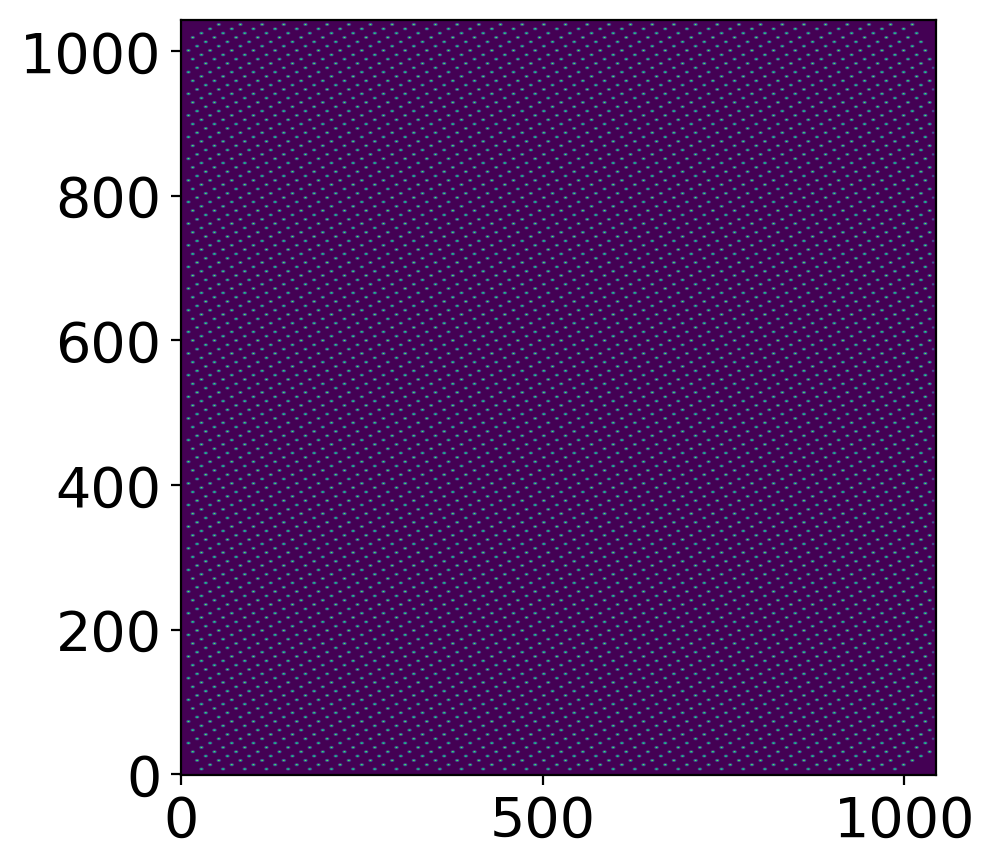

In [31]:
plt.imshow(test[0])

In [34]:
lam_test = np.array([650, 670])
dlam = np.array([5])

lam_bins_test = np.hstack([lam_test - 0.5*dlam, lam_test[-1]+0.5*dlam[-1]])

In [36]:
from astropy.io import fits

In [77]:
star_psf = fits.getdata('stellar_scene_psf_new.fits')[0,0]

In [78]:
star_psf.shape

(60, 241, 241)

<ipython-input-91-647bbfe34438>:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(star_psf[31]), cmap='jet')


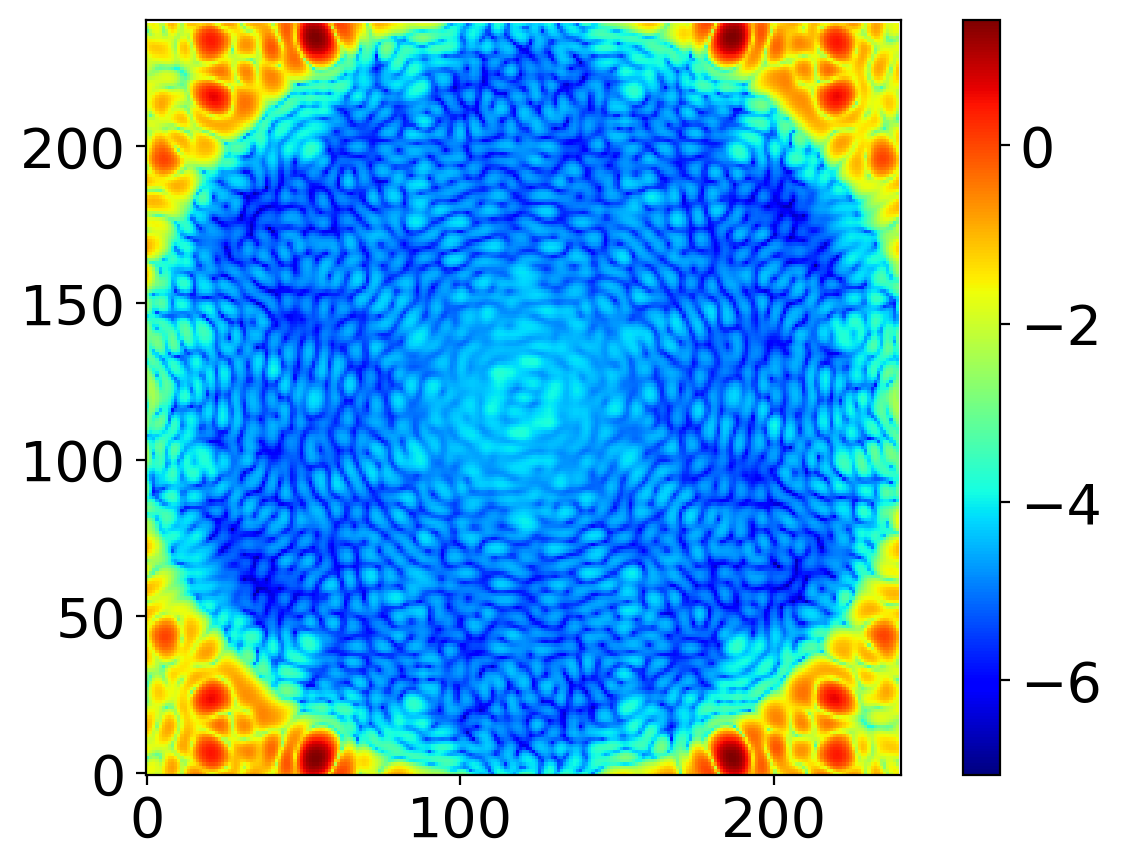

In [91]:
plt.imshow(np.log10(star_psf[31]), cmap='jet')
plt.colorbar()


<ipython-input-82-0a61af2beba8>:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(star_psf.sum(0)))


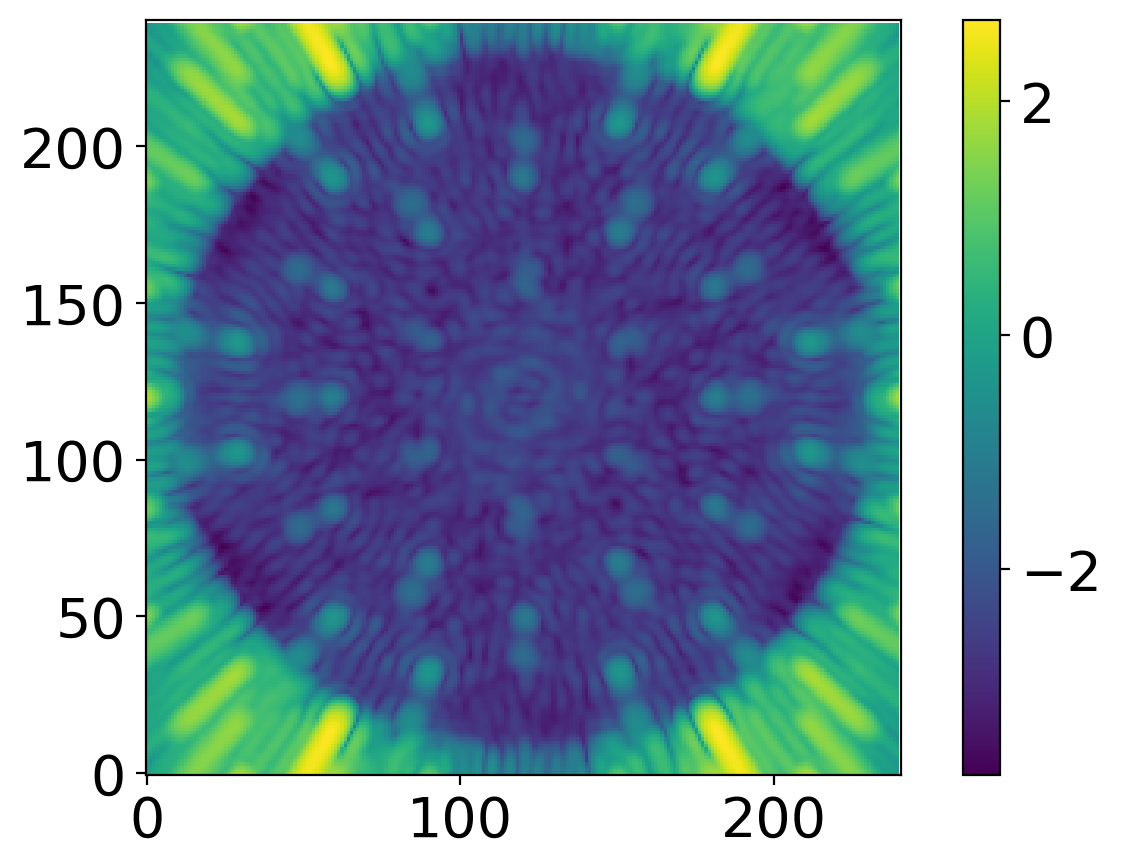

In [82]:
plt.imshow(np.log10(star_psf.sum(0)))
plt.colorbar()

In [69]:
np.log10(star_psf).sum(0).shape

<ipython-input-69-4071bbb4f762>:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(star_psf).sum(0).shape


(241, 241)

In [74]:
total = 0
for i in range(60):
    print(star_psf[i])
    
total

[[0.00116223 0.00297992 0.00547483 ... 0.0061438  0.00999987 0.        ]
 [0.00092002 0.00381555 0.01061856 ... 0.0067231  0.00888834 0.        ]
 [0.00252524 0.00214283 0.01072144 ... 0.00527079 0.00640496 0.        ]
 ...
 [0.00362273 0.00647199 0.00529047 ... 0.01058854 0.00209602 0.        ]
 [0.00436008 0.00894442 0.00671788 ... 0.01047388 0.00374376 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.00318828 0.00639406 0.00854353 ... 0.00676547 0.00917584 0.        ]
 [0.00224627 0.00654439 0.01286634 ... 0.00663363 0.00786108 0.        ]
 [0.00286446 0.0040233  0.01212201 ... 0.00488061 0.00553748 0.        ]
 ...
 [0.00313963 0.00559812 0.00490918 ... 0.01203252 0.00398919 0.        ]
 [0.00381122 0.007917   0.00664647 ... 0.01276187 0.00648318 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.00518764 0.00975411 0.01153861 ... 0.00732723 0.00826906 0.        ]
 [0.00355363 0.00921718 0.01500112 ... 

0